In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN,Flatten
import numpy as np
import math
import matplotlib.pyplot as plt

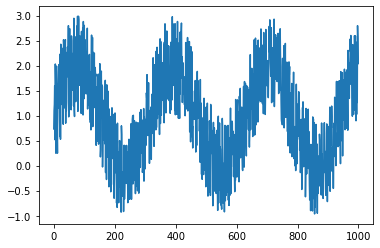

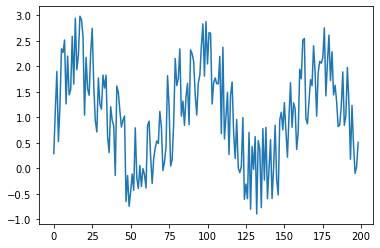

In [10]:
N=1000
tp=800
t=np.arange(0,N)
X=np.sin(0.02*t)+2*np.random.rand(N)
plt.plot(t,X)
plt.show()
df=pd.DataFrame(X)

values=df.values
train,test=values[0:tp,:],values[tp:N,:]

step=4
test=np.append(test,np.repeat(test[-1,:],step))
train=np.append(train,np.repeat(train[-1,:],step))

def convertToMatrix(data,step,sequence_size):
    X=[]
    y=[]
 
    for i in range(0, len(data) - sequence_size, step):
        X.append(data[i:i+sequence_size])
        #print("X",X)
        y.append(data[i+sequence_size])
        #print(y)
    return np.array(X),np.array(y)

sequence_size=10
X_train,y_train=convertToMatrix(train,step,sequence_size)
X_test,y_test=convertToMatrix(test,step,sequence_size)

scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))


t=np.linspace(0,len(y_train))
plt.plot(y_train)

#X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 320)               105920    
                                                                 
 dense (Dense)               (None, 800)               256800    
                                                                 
 dense_1 (Dense)             (None, 1)                 801       
                                                                 
Total params: 363,521
Trainable params: 363,521
Non-trainable params: 0
_________________________________________________________________


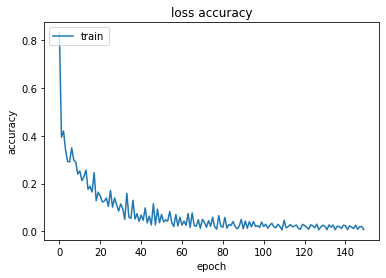

In [11]:
model=Sequential()
model.add(SimpleRNN(units=320, input_shape=(1,sequence_size), activation='relu'))
model.add(Dense(800, activation='relu')) 
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

history=model.fit(X_train,y_train, epochs=150, verbose=0)

model.summary()

plt.plot(history.history['loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

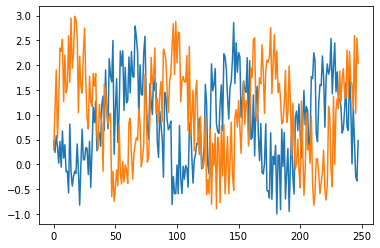

In [12]:
test_prediction = model.predict(X_test)
train_prediction=model.predict(X_train)
prediction=np.concatenate((test_prediction,train_prediction),axis=0)

plt.plot(prediction)
#plt.show()
plt.plot(np.concatenate((y_train,y_test),axis=0))
plt.show()